# **Computer Vision Lab04: Local Image Features**

In [0]:
# Import Statements
import cv2
import matplotlib.pyplot as plt
import numpy as np

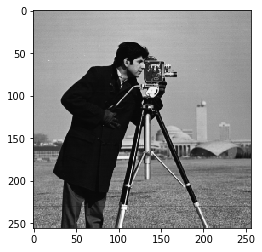

In [16]:
# read image in grayscale mode
image = cv2.imread("cameraman.tif")
plt.imshow(image)

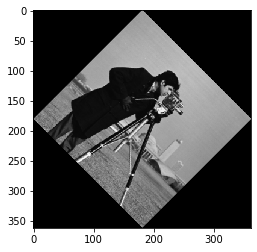

In [17]:
(h, w) = image.shape[:2]
(cX, cY) = (w // 2, h // 2)
angle = 45

# applying negative of angle to move clockwise
matrix = cv2.getRotationMatrix2D((cX, cY), -angle, 1.0)
cos = np.abs(matrix[0, 0])
sin = np.abs(matrix[0, 1])

# compute the new bounding dimensions of the image
nW = int((h * sin) + (w * cos))
nH = int((h * cos) + (w * sin))

# adjust the rotation matrix to take into account translation
matrix[0, 2] += (nW / 2) - cX
matrix[1, 2] += (nH / 2) - cY

# perform the actual rotation
rotated_image = cv2.warpAffine(image, matrix, (nW, nH))
plt.imshow(rotated_image)

## **Harris Corner**

In [0]:
def harris_corner(image):
  result = cv2.cornerHarris(cv2.cvtColor(image,cv2.COLOR_BGR2GRAY), 3, 3, 0.04)
  result = cv2.dilate(result,None)
  temp = image.copy()
  temp[result > 0.01 * result.max()] = [0,0,255]
  return temp

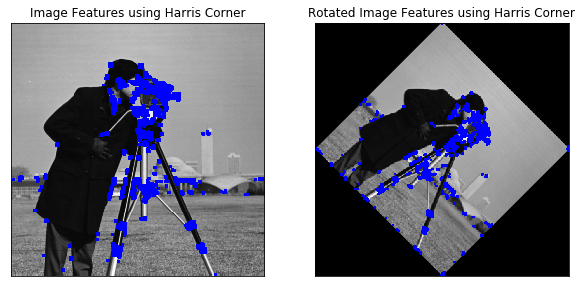

In [19]:
# Plot features using Harris Corner
fig=plt.figure(figsize=(10,6))

fig.add_subplot(1, 2, 1, xticks=[], yticks=[])
plt.title("Image Features using Harris Corner")
harris_image = harris_corner(image)
plt.imshow(harris_image)


fig.add_subplot(1, 2, 2, xticks=[], yticks=[])
plt.title("Rotated Image Features using Harris Corner")
harris_image = harris_corner(rotated_image)
plt.imshow(harris_image)
plt.show()

## **FAST Feature Detection**

In [0]:
def fast_detect(image):
  temp = image.copy()
  grayscale = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  # Initiate FAST object with default values
  fast = cv2.FastFeatureDetector_create()
  keypoints = fast.detect(grayscale, None)
  result = cv2.drawKeypoints(temp, keypoints,np.array([]), color=(255,0,0))

  return result

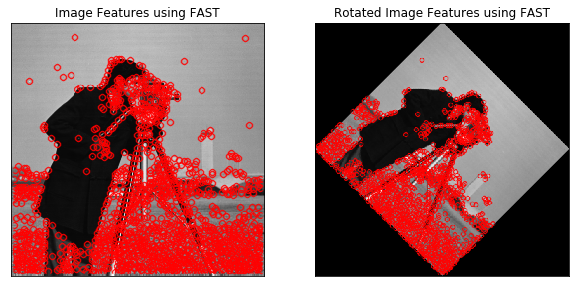

In [48]:
# Plot features using Harris Corner
fig=plt.figure(figsize=(10,6))

fig.add_subplot(1, 2, 1, xticks=[], yticks=[])
plt.title("Image Features using FAST")
fast_image = fast_detect(image)
plt.imshow(fast_image)


fig.add_subplot(1, 2, 2, xticks=[], yticks=[])
plt.title("Rotated Image Features using FAST")
fast_image = fast_detect(rotated_image)
plt.imshow(fast_image)
plt.show()

## **ORB**

In [0]:
def orb(image):
  temp = image.copy()
  grayscale = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  orb = cv2.ORB_create()
  keypoints = orb.detect(grayscale, None)
  keypoints, descriptors = orb.compute(image, keypoints)
  result = cv2.drawKeypoints(temp, keypoints, np.array([]), color=(255,0,0))

  return result

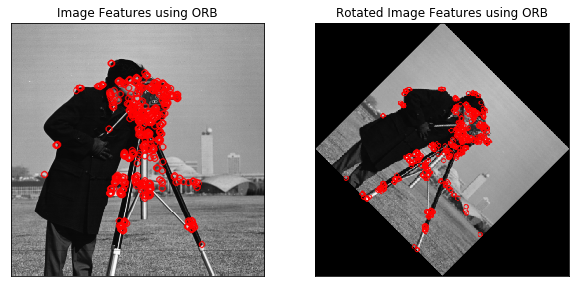

In [46]:
# Plot features using Harris Corner
fig=plt.figure(figsize=(10,6))

fig.add_subplot(1, 2, 1, xticks=[], yticks=[])
plt.title("Image Features using ORB")
orb_image = orb(image)
plt.imshow(orb_image)


fig.add_subplot(1, 2, 2, xticks=[], yticks=[])
plt.title("Rotated Image Features using ORB")
orb_image = orb(rotated_image)
plt.imshow(orb_image)
plt.show()